# **Loan Approval Project**

#### Import Packages




In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# random
from numpy.random import rand, randn

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt
# linear regression two ways
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict 
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount("/drive")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [3]:
boa_df=pd.read_csv('/drive/My Drive/orie4741 project/boa_data.csv', index_col=0)

In [4]:
cat_f=['submission_of_application', 'applicant_age_above_62','applicant_sex', 'co-applicant_sex',
 'applicant_ethnicity-1', 'co-applicant_ethnicity-1', 'co-applicant_race-1','applicant_credit_score_type', 'co-applicant_credit_score_type',
 'occupancy_type','loan_purpose','business_or_commercial_purpose']
boa_df[cat_f]=boa_df[cat_f].astype(str)

In [5]:
boa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371933 entries, 0 to 377467
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   conforming_loan_limit              371933 non-null  object 
 1   derived_loan_product_type          371933 non-null  object 
 2   derived_dwelling_category          371933 non-null  object 
 3   derived_ethnicity                  371933 non-null  object 
 4   derived_race                       371933 non-null  object 
 5   derived_sex                        371933 non-null  object 
 6   action_taken                       371933 non-null  int64  
 7   loan_purpose                       371933 non-null  object 
 8   business_or_commercial_purpose     371933 non-null  object 
 9   loan_amount                        371933 non-null  float64
 10  loan_term                          371933 non-null  float64
 11  property_value                     3719

In [6]:
boa_df.describe()

,action_taken,loan_amount,loan_term,property_value,total_units,income,tract_minority_population_percent,tract_to_msa_income_percentage,missing_income
count,371933.000000,3.719330e+05,371933.000000,3.719330e+05,371933.000000,371933.000000,371933.000000,371933.000000,371933.000000
mean,0.545262,2.193775e+05,351.419078,5.775536e+05,1.030030,142.651552,38.389648,125.684922,0.024830
std,0.497948,3.283522e+05,37.965090,2.934857e+06,0.213186,316.229266,26.978499,50.645069,0.155606
min,0.000000,1.500000e+04,24.000000,5.000000e+03,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.500000e+04,360.000000,2.450000e+05,1.000000,57.000000,16.250000,91.000000,0.000000
50%,1.000000,1.050000e+05,360.000000,3.950000e+05,1.000000,96.000000,31.420000,118.000000,0.000000
75%,1.000000,2.550000e+05,360.000000,6.650000e+05,1.000000,160.000000,56.870000,152.000000,0.000000
max,1.000000,2.000500e+07,360.000000,9.990050e+08,4.000000,71554.000000,100.000000,468.000000,1.000000


## **Preliminary Analysis**

#### Exploring Protected Attributes 

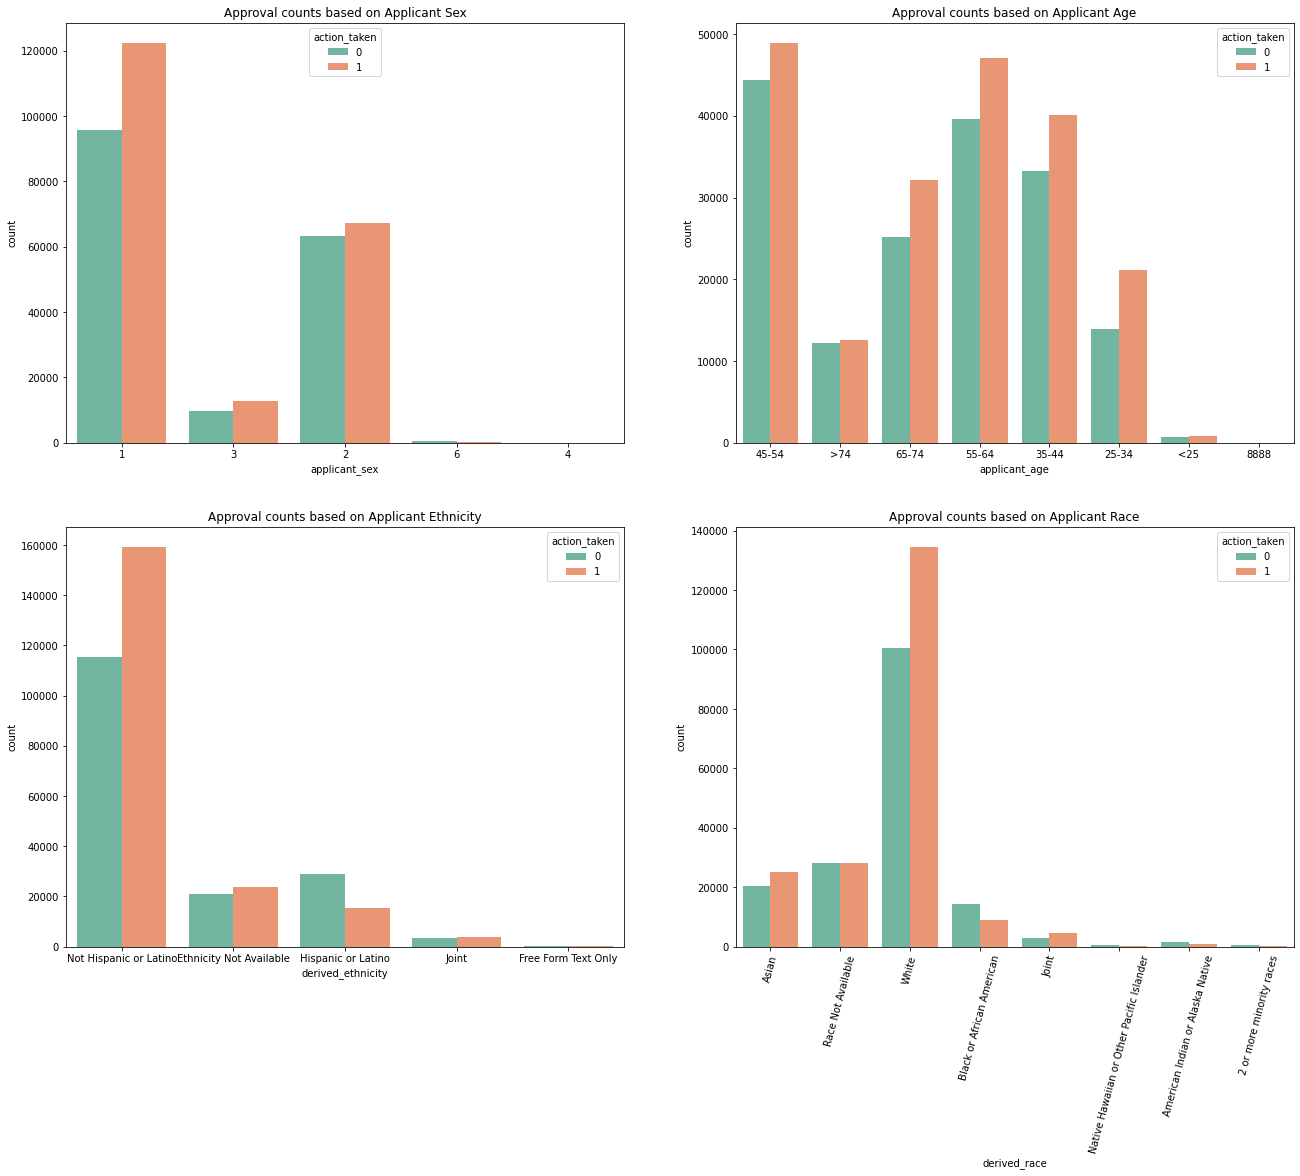

In [8]:
import matplotlib.pyplot as plt
#fig,axes = plt.subplots(4,2,figsize=(12,15))
#for idx,cat_col in enumerate(boa_df['applicant_sex]):
#    row,col = idx//2,idx%2
#    sns.countplot(x=boa_df['applicant_sex'],data=boa_df,hue='action_taken',ax=axes[row,col])
sns.set_palette("Set2")
fig,axes = plt.subplots(2,2,figsize=(22,17))
sns.countplot(x=boa_df['applicant_sex'],data=boa_df,hue='action_taken',ax=axes[0,0]).set(title="Approval counts based on Applicant Sex")
sns.countplot(x=boa_df['applicant_age'],data=boa_df,hue='action_taken',ax=axes[0,1]).set(title="Approval counts based on Applicant Age")
sns.countplot(x=boa_df['derived_ethnicity'],data=boa_df,hue='action_taken',ax=axes[1,0]).set(title="Approval counts based on Applicant Ethnicity")
sns.countplot(x=boa_df['derived_race'],data=boa_df,hue='action_taken',ax=axes[1,1]).set(title="Approval counts based on Applicant Race")
plt.xticks(rotation=75)
sns.set_palette("muted")
#plt.subplots_adjust(hspace=1)

### Identify/Eliminate Outilers Using Boxplots

Text(0.5, 1.0, 'Income VS Action Taken')

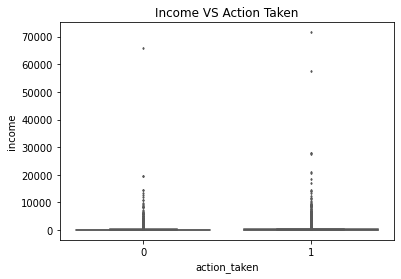

In [ ]:
sns.boxplot(x=boa_df["action_taken"], y=boa_df["income"], data=boa_df, palette="Set2",fliersize=1.5)
plt.title("Income VS Action Taken")

Text(0.5, 1.0, 'Income VS Action Taken - Capped at Income of $600,000')

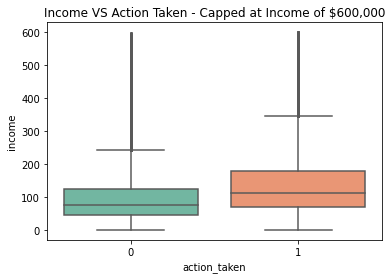

In [ ]:
#boa_df[boa_df["income"]<50000]
sns.boxplot(x=boa_df["action_taken"], y=boa_df[boa_df["income"]<600]["income"], data=boa_df, palette="Set2",fliersize=1.5)
plt.title("Income VS Action Taken - Capped at Income of $600,000")

In [ ]:
#removing income outliers
boa_df=boa_df[boa_df["income"]<50000]

Text(0.5, 1.0, 'Loan Amount VS Action Taken')

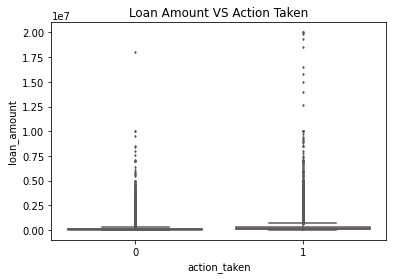

In [ ]:
sns.boxplot(x=boa_df["action_taken"], y=boa_df["loan_amount"], data=boa_df, palette="Set2",fliersize=1.5)
plt.title("Loan Amount VS Action Taken")

Text(0.5, 1.0, 'Loan Amount VS Action Taken - Capped at Loan Amount of $1500000')

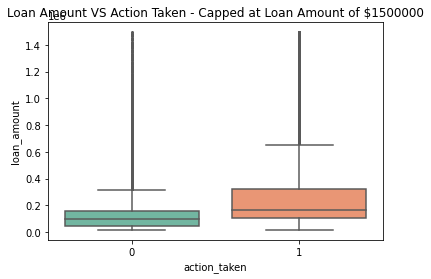

In [ ]:
sns.boxplot(x=boa_df["action_taken"], y=boa_df[boa_df["loan_amount"]<1500000]["loan_amount"], data=boa_df, palette="Set2",fliersize=1.5)
plt.title("Loan Amount VS Action Taken - Capped at Loan Amount of $1500000")

Text(0.5, 1.0, 'Property Value VS Action Taken')

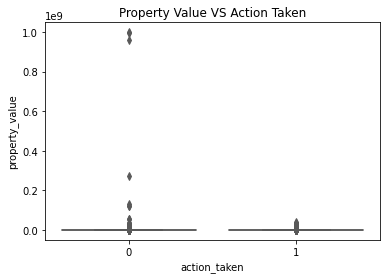

In [ ]:
sns.boxplot(x=boa_df["action_taken"], y=boa_df["property_value"], data=boa_df, palette="Set2")
plt.title("Property Value VS Action Taken")

Text(0.5, 1.0, 'Property Value VS Action Taken - Capped at Property Value of $3000000')

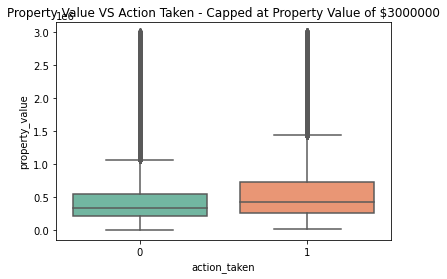

In [ ]:
sns.boxplot(x=boa_df["action_taken"], y=boa_df[boa_df["property_value"]<3000000]["property_value"], data=boa_df, palette="Set2")
plt.title("Property Value VS Action Taken - Capped at Property Value of $3000000")

### Heap Map to Visulize Feature Correlations

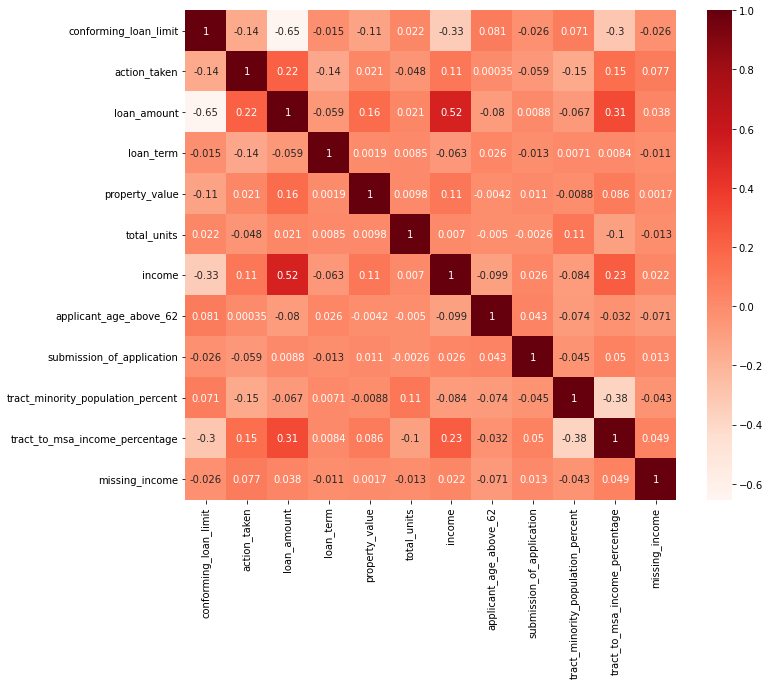

In [ ]:
plt.figure(figsize=(11,9))
corr = boa_df2.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

plt.show()

## **Data Manipulation and Feature Selection through Regressions**

In [6]:
obj=boa_df.select_dtypes(include=['object'])

In [7]:
#boolean data
def string_to_bool(string):
  if string=='C'or string =='Yes' or string =='1' :
    return 1
  else:
    return 0

In [8]:

bool_labels = [
  'conforming_loan_limit', 'applicant_age_above_62','submission_of_application',]
boa_df2=boa_df
boa_df2[bool_labels]=boa_df2[bool_labels].applymap(lambda x: string_to_bool(x))


In [9]:
#categorical data
def onehot(column=None, col=None):
    result= np.concatenate([np.array(column==l).reshape((column.size,1)) for l in col], axis = 1)
    return result

In [10]:

cat_features = boa_df.loc[:, ~boa_df.columns.isin(['conforming_loan_limit', 'applicant_age_above_62','submission_of_application'])].columns


In [11]:
realandother=boa_df.select_dtypes(exclude=['object'])
realandother.columns

Index(['conforming_loan_limit', 'action_taken', 'loan_amount', 'loan_term',
       'property_value', 'total_units', 'income', 'applicant_age_above_62',
       'submission_of_application', 'tract_minority_population_percent',
       'tract_to_msa_income_percentage', 'missing_income'],
      dtype='object')

In [12]:
real=['loan_amount', 'loan_term',
       'property_value', 'total_units', 'income','tract_minority_population_percent',
       'tract_to_msa_income_percentage']

### Logit Regression 

In [19]:
cat_x = ['conforming_loan_limit', 'loan_purpose',
       'business_or_commercial_purpose', 'occupancy_type',
        'applicant_credit_score_type',
       'co-applicant_credit_score_type','applicant_sex',
       'co-applicant_sex','applicant_age_above_62',
       'submission_of_application', 'missing_income','applicant_ethnicity-1',
       'co-applicant_ethnicity-1', 'co-applicant_race-1']
     
for i in cat_x:
    logistic_model = sm.Logit(boa_df2['action_taken'], boa_df2[i].astype(int)).fit()
    print (logistic_model.summary())


Optimization terminated successfully.
         Current function value: 0.692318
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:           action_taken   No. Observations:               371933
Model:                          Logit   Df Residuals:                   371932
Method:                           MLE   Df Model:                            0
Date:                Sat, 04 Dec 2021   Pseudo R-squ.:               -0.004751
Time:                        20:08:17   Log-Likelihood:            -2.5750e+05
converged:                       True   LL-Null:                   -2.5628e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
conforming_loan_limit     0.0859      0.003     24.831      0.000       0.079       0.

### Ordinary Least Square Regression

In [20]:
import statsmodels.api as sm
#['num_of_women','GDP_Per_Capita']
xvals=list(boa_df.select_dtypes(exclude='object').columns)
xvals.remove("action_taken")

X =boa_df[xvals]

Y =boa_df["action_taken"]


X = sm.add_constant(X)
model = sm.OLS(Y,X.astype(float))
results = model.fit()

print('Parameters: ', results.params)
print('R2: ', results.rsquared)

print(results.summary())

Parameters:  const                                1.610976e+00
conforming_loan_limit               -5.572240e-03
loan_amount                          3.049207e-07
loan_term                           -1.671985e-03
property_value                      -2.244389e-09
total_units                         -7.663719e-02
income                              -5.099485e-05
applicant_age_above_62               2.018610e-02
submission_of_application           -4.514015e-01
tract_minority_population_percent   -2.053422e-03
tract_to_msa_income_percentage       5.104081e-04
missing_income                       2.030869e-01
dtype: float64
R2:  0.09355407139867933
                            OLS Regression Results                            
Dep. Variable:           action_taken   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     3490.
Date:                Sat, 04 De

we decided to take features with coefficient < 0.01 out of consideration regarding what factors can potentially influence the loan approval status. By comparing the coefficients from the summaries of different features, we found that missing_income, Applicant_sex, applicant_age_above_62 are the important features among all the input features for the logistic model. 


In [13]:
boa_df4=boa_df2

In [14]:
boa_df4=boa_df2.drop(columns=['derived_loan_product_type','derived_dwelling_category','applicant_credit_score_type','co-applicant_credit_score_type','loan_purpose','co-applicant_sex'])

In [15]:
boa_df4=boa_df4.drop(columns=['conforming_loan_limit','tract_to_msa_income_percentage'])

In [16]:
boa_df5=pd.get_dummies(boa_df4)


### Train Test Split

In [17]:
train_proportion = 0.8
n = len(boa_df5) 
print('Size of dataset: ', str(n))
t = int(train_proportion * n)

target = boa_df5['action_taken']
data = boa_df5.loc[:, ~boa_df5.columns.isin(['action_taken'])]
train_x_clean = data.iloc[:t,:]
test_x_clean = data.iloc[t:,:]
train_y_clean = target[:t]
test_y_clean = target[t:]

print('Training dataset: ', train_x_clean)

Size of dataset:  371933
Training dataset:          loan_amount  ...  co-applicant_age_above_62_Yes
0           65000.0  ...                              0
1          125000.0  ...                              1
2          105000.0  ...                              1
3          105000.0  ...                              0
4           55000.0  ...                              0
...             ...  ...                            ...
301873     125000.0  ...                              0
301874     105000.0  ...                              0
301875      65000.0  ...                              0
301876      75000.0  ...                              1
301877     155000.0  ...                              0

[297546 rows x 114 columns]


In [18]:
train_n = len(train_x_clean) 
t=int(train_n * 0.8)
train_x_clean = data.iloc[:t,:]
# the following variable records the features of examples in the val set
val_x = data.iloc[t:,:]
# the following variable records the labels of examples in the training set
train_y_clean = target[:t]
# the following variable records the labels of examples in the val set
val_y = target[t:]

# **Model Building**

### Logistic Regression Classifier

Logistic regression is used when the target variable is a categorical variable, and it made sense in our analysis since loan approval is also categorical. We built a logistic regression classifier model using the training set, and we found that the testing accuracy for such a model is quite low, 


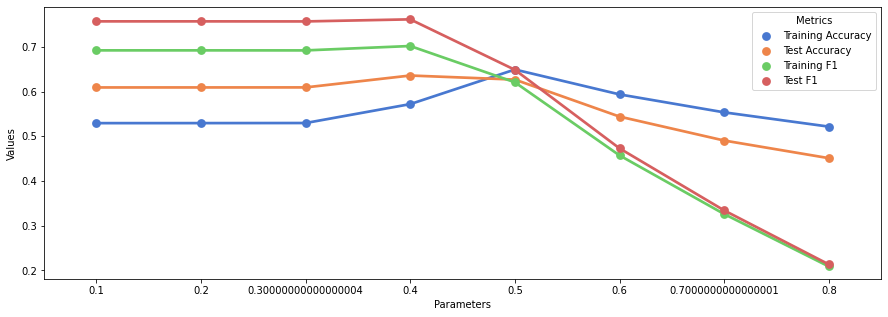

In [34]:

train_acc_list = []
test_acc_list = []
train_f1_list = []
test_f1_list = []
param_list = []

for th in np.arange(0.1,0.9,0.1): 
    lr = LogisticRegression(solver='liblinear')
    lr.fit(x_train,y_train)
    
    y_train_th = lr.predict_proba(x_train)[:,1]
    y_pred_tr = (y_train_th > th).astype(int)

    train_acc = accuracy_score(y_train,y_pred_tr)
    train_f1 = f1_score(y_train,y_pred_tr)
    
    y_test_th = lr.predict_proba(x_test)[:,1]
    y_pred_te = (y_test_th > th).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_te)
    test_f1 = f1_score(y_test,y_pred_te)
    

    train_acc_list.append(train_acc)
    train_f1_list.append(train_f1)
    test_acc_list.append(test_acc)
    test_f1_list.append(test_f1)
    param_list.append(th)
    
    
Th_logreg = {"Training Accuracy": train_acc_list, "Test Accuracy": test_acc_list, "Training F1": train_f1_list, "Test F1":test_f1_list, "Parameters": param_list }
Th_logreg_df = pd.DataFrame.from_dict(Th_logreg)

plot_df = Th_logreg_df.melt('Parameters',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Parameters", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_tr_pred =lr.predict(x_train)
y_te_pred = lr.predict(x_test)
print("Tranning Accuracy of Logistic Regression Classifier: ", accuracy_score(y_train,y_tr_pred))
print("Testing Accuracy of Logistic Regression Classifier: ", accuracy_score(y_test,y_te_pred))


Tranning Accuracy of Logistic Regression Classifier:  0.6490871938267954
Testing Accuracy of Logistic Regression Classifier:  0.627040034415078


Since the accuracy is low, so we found another way to improve on the logistics model, which is using the grid search.

#### Grid Search 

In [ ]:
gs= GridSearchCV(estimator=lr, param_grid={'tol': [5,2.5,0.5], 'max_iter': [70, 100, 130]}, cv=5)
gsr = gs.fit(x_train, y_train)


In [ ]:
Best_Score, Best_Parameters = gsr.best_score_ , gsr.best_params_
print("Best Score:",Best_Score)
print("Best_Parameters" , (Best_Score, Best_Parameters))

Best Score: 0.6508583431464181
Best_Parameters (0.6508583431464181, {'max_iter': 100, 'tol': 5})


We can see that the test accuracy improved by nearly .03, since this improvement is not significant, we decided to build another model: random forest.


### Random Forest

In [19]:
train_proportion = 0.8
n = len(boa_df5) 

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
t = int(train_proportion * n)

target = boa_df5['action_taken']
data = boa_df5.loc[:, ~boa_df5.columns.isin(['action_taken'])]

# the following variable records the features of examples in the training set
x_train = data.iloc[:t,:]
# the following variable records the features of examples in the test set
x_test = data.iloc[t:,:]
# the following variable records the labels of examples in the training set
y_train = target[:t]
# the following variable records the labels of examples in the test set
y_test = target[t:]

#### Looping through the possible values of max_dept between 5 to 25

In [ ]:



max_depth_list=np.linspace(5,25,5)
train_acc_list=[]
val_acc_list=[]
for max_depth in max_depth_list:
  rfc = RandomForestClassifier(n_estimators=100,max_depth=max_depth,min_samples_leaf = 20)
  rfc.fit(x_train,y_train)
  y_train_pred= rfc.predict(x_train)
  train_acc_list.append(accuracy_score(y_train,y_train_pred))
  val_acc_list.append(cross_val_score(rfc,x_train,y_train,cv=10,scoring='accuracy').mean())

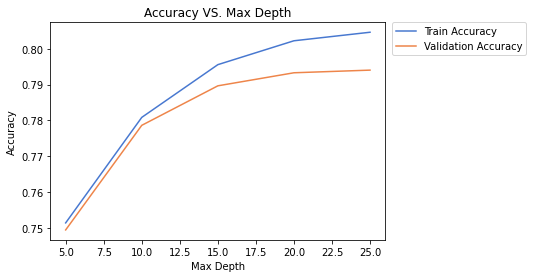

In [ ]:
plt.plot(max_depth_list,train_acc_list,label='Train Accuracy')
plt.plot(max_depth_list,val_acc_list,label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

plt.title('Accuracy VS. Max Depth')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#### Looping through the possible values of min_samples_leaf between 15 to 40 

In [ ]:
min_samples_leaf=np.linspace(10,25,4).astype(int)
train_acc_list=[]
val_acc_list=[]
for minleaf in min_samples_leaf:
  rfc = RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_leaf = minleaf)
  rfc.fit(x_train, y_train)
  y_train_pred= rfc.predict(x_train)
  train_acc_list.append(accuracy_score(y_train,y_train_pred))
  val_acc_list.append(cross_val_score(rfc,x_train,y_train,cv=5,scoring='accuracy').mean())

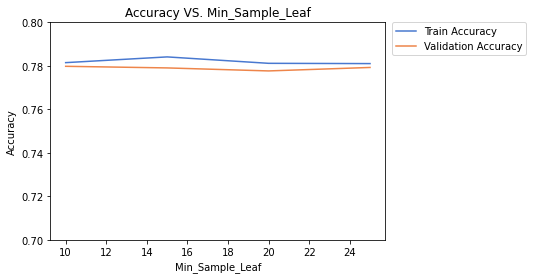

In [ ]:
plt.plot(min_samples_leaf,train_acc_list,label='Train Accuracy')
plt.plot(min_samples_leaf,val_acc_list,label='Validation Accuracy')
plt.xlabel('Min_Sample_Leaf')
plt.ylabel('Accuracy')
plt.ylim(0.70,0.80)
plt.title('Accuracy VS. Min_Sample_Leaf')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

 By examining the first line graph below, “Accuracy VS. Min_Sample_Leaf”, we see a peak at min_sample_leaf equals 15 which corresponds to the highest train accuracy and validation accuracy. The line graph “Accuracy VS. Max. Depth” suggests that the optimal max_depth is around 15 since the margin between train accuracy and validation accuracy is within 0.01. In the end, we concluded that the minimum error amount occurred at the optimal parameters of min_samples_leaf equal 15 and max_depth equal 15.


In [ ]:
def cross_validation(xTr,yTr,xValid,yValid,min_samples_leaf):
    
    ErrorMatrix=np.zeros(len(min_samples_leaf))
    best_min_samples_leaf = 0
   
    min_err=float('inf')

    for m in range(int(len(min_samples_leaf))):
            M=min_samples_leaf[m]
            rf = RandomForestRegressor(n_estimators=100,max_depth=15,min_samples_leaf = M)
            model=rf.fit(xTr, yTr)
            pred = model.predict(xValid)
            error = np.mean((np.sign(pred)!=yValid))
            ErrorMatrix[m] = error
            if  min_err > error:
                min_err = error
                # best_n_estimators = N
                best_min_samples_leaf = M
                
    return best_min_samples_leaf,ErrorMatrix

In [ ]:
min_samples_leaf=list(np.linspace(15, 40, num=5).astype(int))
w=cross_validation(train_x_clean,train_y_clean,val_x,val_y,min_samples_leaf)

In [ ]:
w

(15, array([0.27039845, 0.27116024, 0.27234774, 0.27290041, 0.27530528]))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rff= RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_leaf = 15)
rff.fit(x_train,y_train)
ytepred = rff.predict(x_test)
print("Accuracy of RandomForestClassifier: ",accuracy_score(y_test,ytepred))


Accuracy of RandomForestClassifier:  0.8011050466485629


In [ ]:
print("Confusion Matrix (Test Data)")
pd.crosstab(y_test, ytepred, rownames=['Y_test_true'], colnames=['Predicted_Y_test'], margins=True)

Confusion Matrix (Test Data)


Predicted_Y_test,0,1,All
Y_test_true,,,
0,19660,9418,29078
1,5377,39931,45308
All,25037,49349,74386


Text(0.5, 0, 'Feature Importances Value from Random Forest')

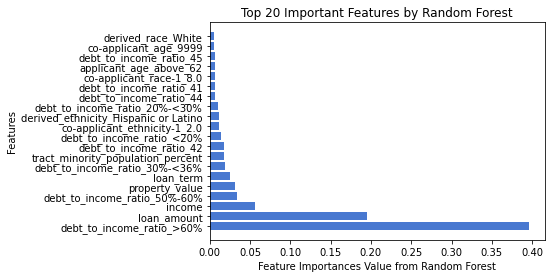

In [ ]:
# fig,axes = plt.subplots(1,1,figsize=(20,25))
# plt.barh(train_x_clean.columns, rf.feature_importances_)
imp_list=rf_clf.feature_importances_
top20_var=[]
top20_val=[]

for x in range(20):
  index=np.argmax(imp_list)
  top20_var.append(train_x_clean.columns[index])
  top20_val.append(imp_list[index])
  imp_list[index]=0
plt.barh(top20_var, top20_val)
plt.title("Top 20 Important Features by Random Forest")
plt.ylabel("Features")
plt.xlabel("Feature Importances Value from Random Forest")
plt.show()

The graph shown above illustrates that debt_to_income_ratio, loan_amount, and income are the most important factors toward loan approval. However, applicant_age_above_62, co-appliacnt_ethinicity, co-applicant_race, derived_race, tract_minority_population_percent, and derived_ethnicity also play a role in determining whether a loan should be approved, indicating that the bank does take unfair elements into consideration and their loan approval system does appear as biased. 

### Boosting


We attempted to perform boosting in order to increase model complexity and accuracy so we used a Ada Boost Classifier.

In [20]:
from sklearn.ensemble import AdaBoostClassifier
AdB = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=5,random_state=0).fit(x_train, y_train)
y_train_pred = AdB.predict(x_train)
y_test_pred = AdB.predict(x_test)

In [21]:
print('Train Accuracy',accuracy_score(y_train,y_train_pred))
print('Test Accuracy',accuracy_score(y_test,y_test_pred))

Train Accuracy 0.9996975257607227
Test Accuracy 0.7996155242179414


From the results shown above, we can see that it overfits the training model resulting in lower test accuracy. We decided to then discard that implementation, 

### Examinating New Model without Protected Attributes

To create a better model, hence a model that is more fair, we decided to remove all the unfair features that was listed above (applicant_age_above_62, co- appliacnt_ethinicity, co-applicant_race, derived_race, tract_minority_population_percent, and derived_ethnicity). 

In [24]:
boa_df6=boa_df4.drop(columns=['applicant_age_above_62','co-applicant_ethnicity-1','co-applicant_race-1','derived_race','derived_ethnicity','tract_minority_population_percent'])
boa_df7=pd.get_dummies(boa_df6)


In [28]:
train_proportion = 0.8
n = len(boa_df7) 

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
t = int(train_proportion * n)

target = boa_df7['action_taken']
data = boa_df7.loc[:, ~boa_df7.columns.isin(['action_taken'])]

# the following variable records the features of examples in the training set
x_train = data.iloc[:t,:]
# the following variable records the features of examples in the test set
x_test = data.iloc[t:,:]
# the following variable records the labels of examples in the training set
y_train = target[:t]
# the following variable records the labels of examples in the test set
y_test = target[t:]

In [31]:
from sklearn.ensemble import RandomForestClassifier

rff3= RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_leaf = 15)
rff3.fit(x_train,y_train)



RandomForestClassifier(max_depth=15, min_samples_leaf=15)

In [33]:
ytrpred=rff3.predict(x_train)
ytepred = rff3.predict(x_test)
print("Training Accuracy of RandomForestClassifier: ",accuracy_score(y_train,ytrpred))
print("Testing Accuracy of RandomForestClassifier: ",accuracy_score(y_test,ytepred))

Training Accuracy of RandomForestClassifier:  0.7966163215099514
Testing Accuracy of RandomForestClassifier:  0.8037157030126232


By doing so and training it again on the Random Forest Classifier, we achieve a training accuracy of 0.7966 and a testing accuracy of 0.803716 To conclude, although our training accuracy did decrease after removing the unfair features and our testing accuracy is around the same, we do see a slight improvement.